# Jonathan Halverson
# Saturday, April 1, 2017
# Neural networks

Here we use the multilayer perceptron to predict iris types.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=['s_len', 's_wdt', 'p_len', 'p_wdt'])
df['species'] = iris.target
df.head()

,s_len,s_wdt,p_len,p_wdt,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


(0, 3)

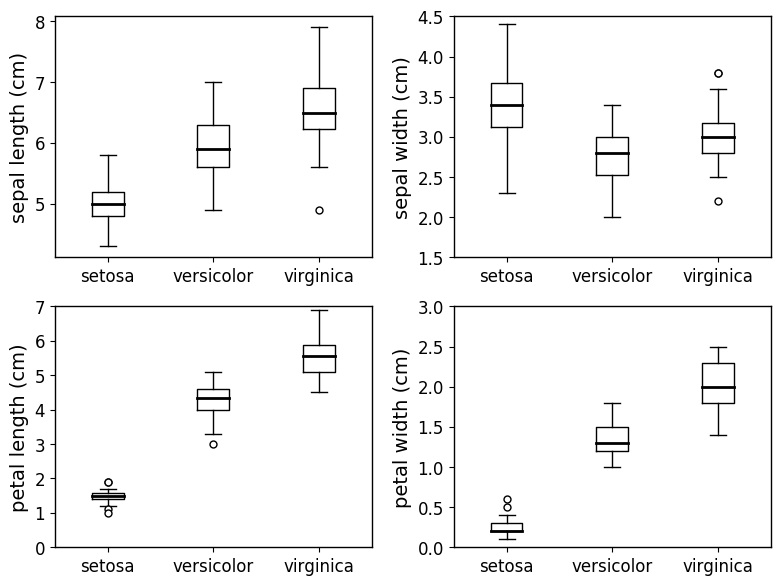

In [4]:
fprops = dict(marker='o', markersize=5, linestyle='none', linewidth=1)
bprops = dict(color='k')
wprops = dict(color='k', linestyle='-', linewidth=1)
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
for i in range(4):
    exec('ax' + str(i) + '.boxplot([df[df.species == 0].ix[:,'+ str(i) + '], df[df.species == 1].ix[:,' + str(i) + '], df[df.species == 2].ix[:,' + str(i) + ']], labels=iris.target_names, flierprops=fprops, boxprops=bprops, whiskerprops=wprops)') 
    exec('ax' + str(i) + '.set_ylabel(iris.feature_names[' + str(i) + '])')
plt.tight_layout()
ax1.set_ylim(1.5, 4.5)
ax2.set_ylim(0, 7)
ax3.set_ylim(0, 3)

In [5]:
X = iris.data
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [8]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train_std, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test_std))

0.97777777777777775